In [55]:
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
matplotlib.pyplot.figure(figsize=(16,9))

# Paste or type your script code here:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

In [6]:
#Youtube : Learn Pandas
#https://www.youtube.com/watch?v=v66K_y3-ezY

import pandas_datareader as dr
import datetime
import pandas_datareader.data as web

In [17]:
start=datetime.datetime(2013,1,1)
end=datetime.datetime(2013,12,31)

In [57]:
# tesla = web.DataReader('TSLA', 'google', start,end)
tesla = dr.data.get_data_yahoo('TSLA', start=start, end=end)
ford = dr.data.get_data_yahoo('F', start=start, end=end)
gm = dr.data.get_data_yahoo('GM', start=start, end=end)

In [19]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2013-01-02 to 2013-12-31
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [20]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,35.450001,34.709999,35.000000,35.360001,1194800,35.360001
2013-01-03,35.450001,34.750000,35.180000,34.770000,742000,34.770000
2013-01-04,34.799999,33.919998,34.799999,34.400002,674000,34.400002
2013-01-07,34.799999,33.900002,34.799999,34.340000,442000,34.340000
2013-01-08,34.500000,33.110001,34.500000,33.680000,1284000,33.680000


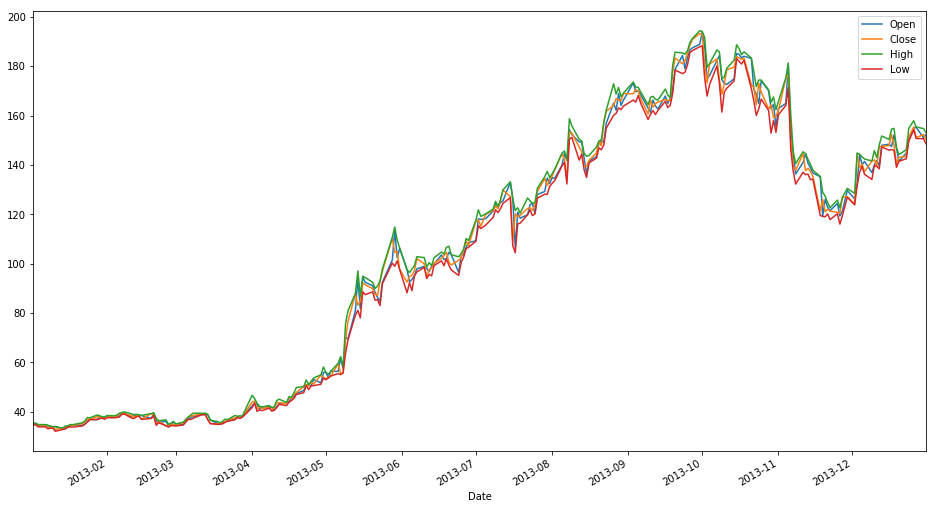

In [47]:
tesla[['Open','Close', 'High', 'Low']].plot(figsize=(16,9))

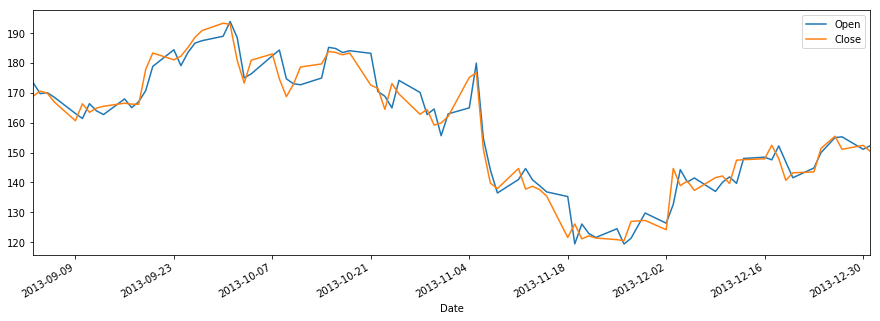

In [49]:
tesla.loc['2013-09-01':'2013-12-31', ['Open', 'Close']].plot(figsize=(15,5));

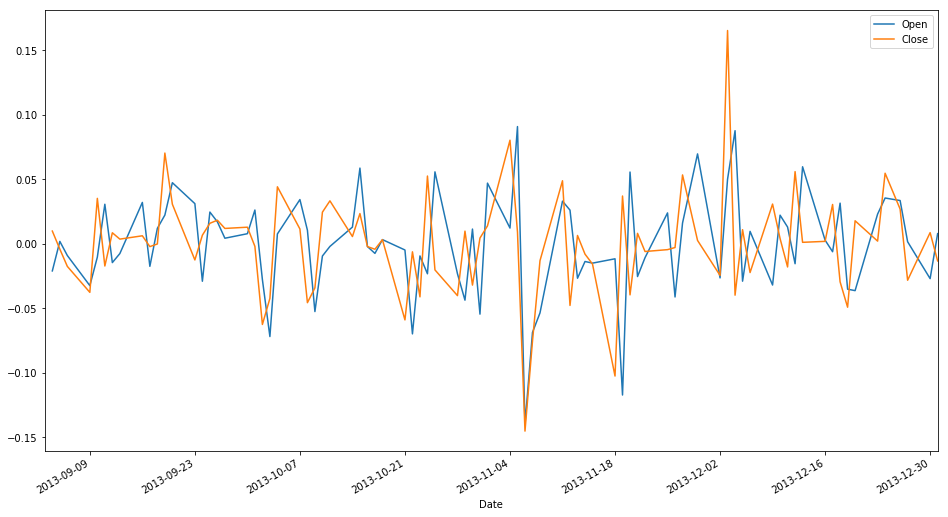

In [50]:
tesla.loc['2013-09-01':'2013-12-31', ['Open', 'Close']].pct_change().plot(figsize=(16,9))

In [23]:
gm = dr.data.get_data_yahoo('GM', start=start, end=end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,29.500000,28.629999,29.410000,29.129999,15605900,23.274031
2013-01-03,30.230000,28.840000,29.049999,29.820000,22903800,23.825319
2013-01-04,29.860001,29.230000,29.740000,29.860001,8066600,23.857279
2013-01-07,29.860001,29.299999,29.639999,29.660000,8385300,23.697483
2013-01-08,29.850000,29.049999,29.660000,29.370001,10435200,23.465784


In [11]:
ford = dr.data.get_data_yahoo('F', start=start, end=end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,8.194133
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.319291
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.532795
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.621139
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.687400


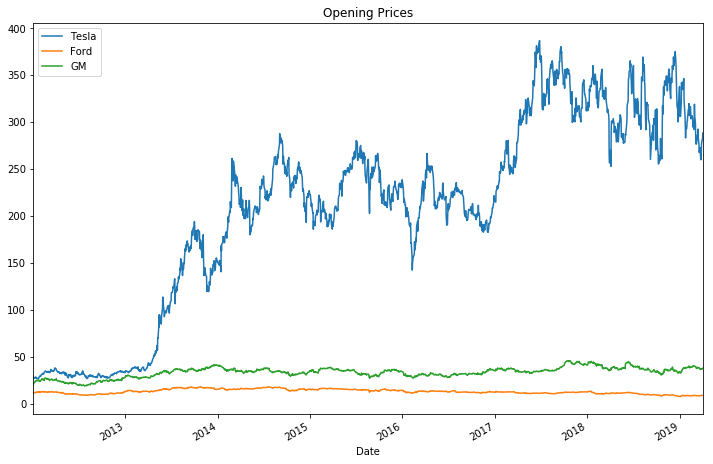

In [12]:
tesla['Open'].plot(label='Tesla', figsize=(12,8), title='Opening Prices')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend();

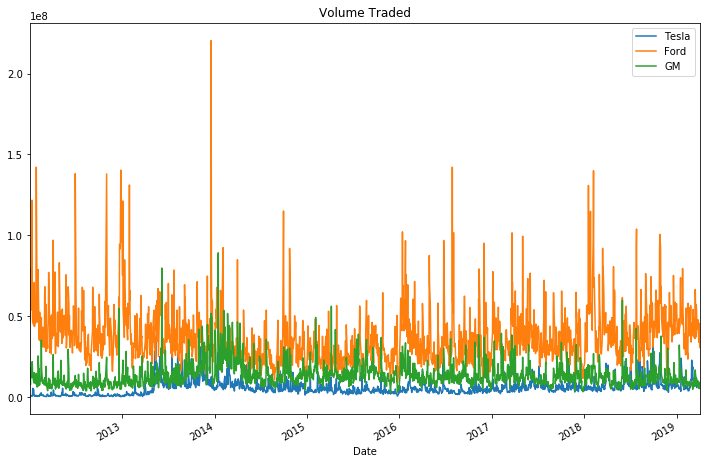

In [13]:
tesla['Volume'].plot(label='Tesla', figsize=(12,8), title='Volume Traded')
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label='GM')
plt.legend();

In [14]:
ford['Volume'].argmax()

Timestamp('2013-12-18 00:00:00')

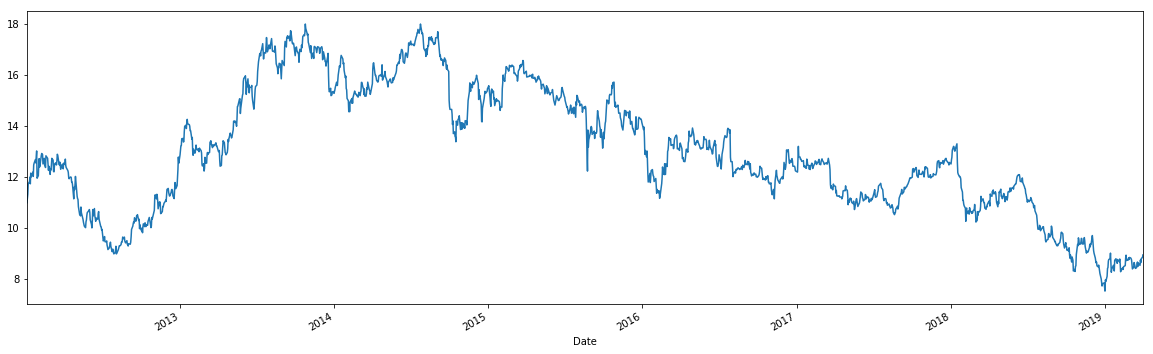

In [15]:
ford['Open'].plot(figsize=(20,6));

In [16]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

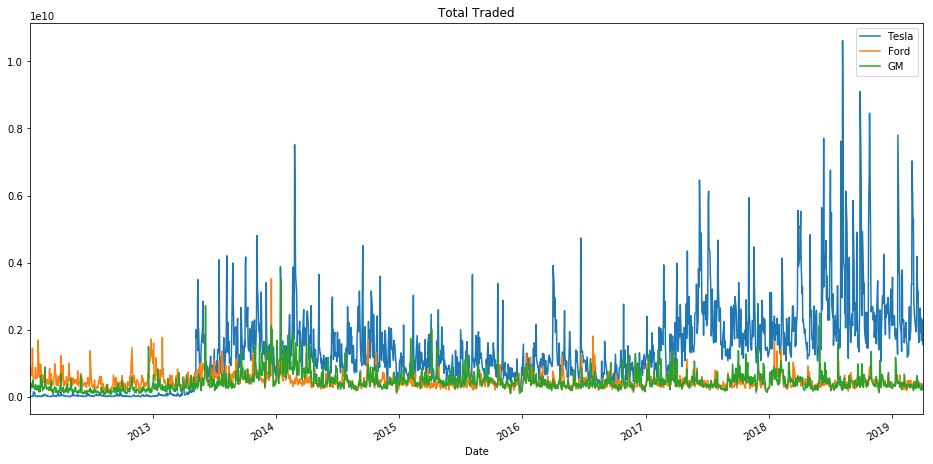

In [17]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16,8), title='Total Traded')
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend();

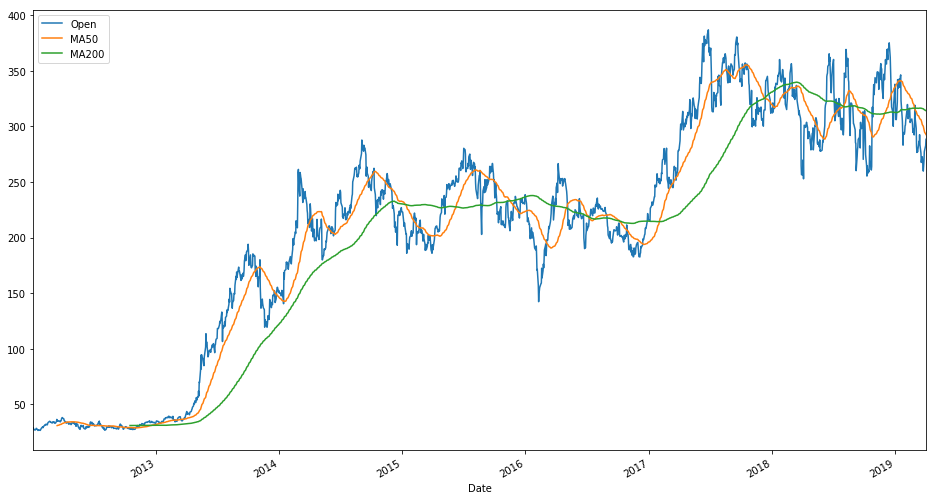

In [18]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open','MA50','MA200']].plot(figsize=(16,9));

In [53]:
from pandas.plotting import scatter_matrix

In [58]:
car_comp=pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)

In [59]:
car_comp.columns=['Tesla', 'GM', 'Ford']

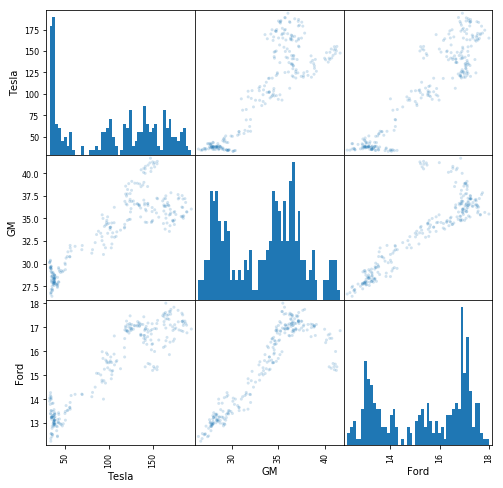

In [62]:
scatter_matrix(car_comp,figsize=(8,8), alpha=0.2,hist_kwds={'bins':50});

In [23]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [24]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,NaN,NaN
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,NaN,NaN
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,NaN,NaN
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,NaN,NaN


In [64]:
tesla_reset=tesla.loc['2013-01'].reset_index()

In [65]:
tesla_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
Date         21 non-null datetime64[ns]
High         21 non-null float64
Low          21 non-null float64
Open         21 non-null float64
Close        21 non-null float64
Volume       21 non-null int64
Adj Close    21 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


In [71]:
import matplotlib.dates as dates
from matplotlib.dates import date2num

tesla_reset['date_ax'] = tesla_reset['Date'].apply(lambda date: date2num(date))
tesla_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,date_ax
0,2013-01-02,35.450001,34.709999,35.000000,35.360001,1194800,35.360001,734870.0
1,2013-01-03,35.450001,34.750000,35.180000,34.770000,742000,34.770000,734871.0
2,2013-01-04,34.799999,33.919998,34.799999,34.400002,674000,34.400002,734872.0
3,2013-01-07,34.799999,33.900002,34.799999,34.340000,442000,34.340000,734875.0
4,2013-01-08,34.500000,33.110001,34.500000,33.680000,1284000,33.680000,734876.0


In [72]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
tesla_values = [tuple(vals) for vals in tesla_reset[list_of_cols].values]

tesla_values

In [73]:
mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
weekFormatter=DateFormatter('%b %d')
dayFormatter=DateFormatter('%d')

NameError: name 'WeekdayLocator' is not defined

NameError: name 'mondays' is not defined

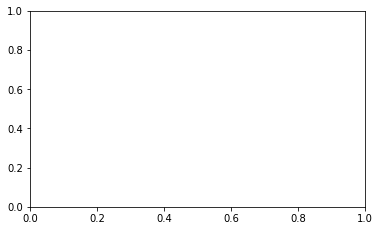

In [74]:
fig, ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, tesla_values, width=0.6,colorup='g', colordown ='r');